### Importação dos dados



In [38]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [39]:
# Adiciona uma nova coluna chamada 'Loja' em cada DataFrame e unir tabelas
loja1 = loja.assign(Loja='Loja 1')
loja2 = loja2.assign(Loja='Loja 2')
loja3 = loja3.assign(Loja='Loja 3')
loja4 = loja4.assign(Loja='Loja 4')
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)
print(df[['Produto', 'Preço', 'Loja']].head(10))



                    Produto    Preço    Loja
0        Assistente virtual   219.08  Loja 1
1            Mesa de jantar   256.35  Loja 1
2         Jogo de tabuleiro   279.51  Loja 1
3               Micro-ondas  1009.99  Loja 1
4     Cadeira de escritório   446.99  Loja 1
5          Blocos de montar    32.26  Loja 1
6               Boneca bebê    58.90  Loja 1
7               Lava louças  1586.23  Loja 1
8        Lavadora de roupas  2024.31  Loja 1
9  Carrinho controle remoto   100.26  Loja 1


#1. Análise do faturamento - Vendas por categoria - Avaliação das lojas - Frete Médio - Produtos Mais e Menos Vendidos


In [51]:
# Agrupamento por Loja e Categoria
vendas_por_categoria = df.groupby(['Loja', 'Categoria do Produto']).agg({
    'Preço': 'sum',
    'Produto': 'count'
}).rename(columns={'Preço': 'Total_Vendido', 'Produto': 'Itens_Vendidos'}).reset_index()

# Ticket Médio por categoria
vendas_por_categoria['Ticket_Medio'] = vendas_por_categoria['Total_Vendido'] / vendas_por_categoria['Itens_Vendidos']

# Ordenação
vendas_por_categoria = vendas_por_categoria.sort_values(by=['Loja', 'Total_Vendido'], ascending=[True, False])

# Loop por loja
for loja in vendas_por_categoria['Loja'].unique():
    loja_df = vendas_por_categoria[vendas_por_categoria['Loja'] == loja]
    dados_loja = df[df['Loja'] == loja]

    total_loja = loja_df['Total_Vendido'].sum()
    total_itens = loja_df['Itens_Vendidos'].sum()
    ticket_medio = total_loja / total_itens
    frete_medio = dados_loja['Frete'].mean()
    avaliacao_media = dados_loja['Avaliação da compra'].mean()

    print(f'\n📍 {loja} — Avaliação média: {avaliacao_media:.2f}  |  Total faturado: R$ {total_loja:,.2f}  |  Itens vendidos: {total_itens}  |  Ticket médio: R$ {ticket_medio:,.2f}  |  Frete médio: R$ {frete_medio:.2f}')
    print('-' * 95)
    print(f'{"Categoria":<35} {"Total (R$)":>15} {"Qtd Itens":>12} {"Ticket Médio (R$)":>20}')
    print('-' * 95)

    for _, row in loja_df.iterrows():
        print(f'{row["Categoria do Produto"]:<35} '
              f'{row["Total_Vendido"]:>15,.2f} '
              f'{row["Itens_Vendidos"]:>12} '
              f'{row["Ticket_Medio"]:>20,.2f}')

    # Produtos mais vendidos
    top_produtos = dados_loja.groupby(['Produto', 'Categoria do Produto']).size().reset_index(name='Qtd')
    top_mais = top_produtos.sort_values(by='Qtd', ascending=False).head(5)
    top_menos = top_produtos.sort_values(by='Qtd').head(5)

    print('\n' + '-' * 40)
    print("5 Produtos Mais Vendidos:")
    for _, row in top_mais.iterrows():
        print(f"• {row['Produto']} ({row['Categoria do Produto']}) — {row['Qtd']} itens")

    print("\n5 Produtos Menos Vendidos:")
    for _, row in top_menos.iterrows():
        print(f"• {row['Produto']} ({row['Categoria do Produto']}) — {row['Qtd']} itens")

    # 🔥 Análise de Pareto
    categorias = dados_loja.groupby('Categoria do Produto')['Preço'].sum().reset_index()
    categorias = categorias.sort_values(by='Preço', ascending=False)
    total_categoria = categorias['Preço'].sum()
    categorias['% Acumulado'] = categorias['Preço'].cumsum() / total_categoria * 100

    mais_rentaveis = categorias[categorias['% Acumulado'] <= 80]
    menos_rentaveis = categorias[categorias['% Acumulado'] > 80]

    print("\n🔍 Análise de Pareto (Faturamento por Categoria)")
    print("-" * 60)
    print("🔝 Categorias mais rentáveis (80% do faturamento):")
    for _, row in mais_rentaveis.iterrows():
        print(f"  • {row['Categoria do Produto']} — R$ {row['Preço']:,.2f}")

    print("\n🔻 Categorias menos rentáveis (20% finais):")
    for _, row in menos_rentaveis.iterrows():
        print(f"  • {row['Categoria do Produto']} — R$ {row['Preço']:,.2f}")
    print("-" * 60)



📍 Loja 1 — Avaliação média: 3.98  |  Total faturado: R$ 1,534,509.12  |  Itens vendidos: 2359  |  Ticket médio: R$ 650.49  |  Frete médio: R$ 34.69
-----------------------------------------------------------------------------------------------
Categoria                                Total (R$)    Qtd Itens    Ticket Médio (R$)
-----------------------------------------------------------------------------------------------
eletronicos                              572,659.23          448             1,278.26
eletrodomesticos                         484,913.36          312             1,554.21
moveis                                   250,178.11          465               538.02
instrumentos musicais                    121,731.69          182               668.86
esporte e lazer                           52,387.55          284               184.46
brinquedos                                23,993.78          324                74.05
utilidades domesticas                     16,931.48      

In [61]:
# Agrupa por estado e conta o número de compras
compras_por_estado = df.groupby('Local da compra').size().reset_index(name='Total_Compras')

# Ordena do maior para o menor
compras_por_estado = compras_por_estado.sort_values(by='Total_Compras', ascending=False)

# Exibe o ranking
print("📍 Ranking de Compras por Estado:")
for i, row in compras_por_estado.iterrows():
    print(f"{row['Local da compra']:<2} — {row['Total_Compras']} compras")

# Agrupa por estado e conta o número de compras
compras_por_estado = df.groupby('Local da compra').size().reset_index(name='Total_Compras')

# Ordena do maior para o menor
compras_por_estado = compras_por_estado.sort_values(by='Total_Compras', ascending=False)

# Calcula o percentual e o acumulado
compras_por_estado['Porcentagem'] = compras_por_estado['Total_Compras'] / compras_por_estado['Total_Compras'].sum()
compras_por_estado['Acumulado'] = compras_por_estado['Porcentagem'].cumsum()

# Define o corte dos 80%
estados_80 = compras_por_estado[compras_por_estado['Acumulado'] <= 0.80]

# Mostra o resultado
print("📊 Pareto dos Estados — Quais representam 80% das compras:\n")
for _, row in estados_80.iterrows():
    print(f"{row['Local da compra']:<2} — {row['Total_Compras']} compras ({row['Acumulado']*100:.2f}% acumulado)")

# Estado limite que atinge os 80%
ultimo_estado = estados_80['Local da compra'].iloc[-1]
print(f"\n✅ Até o estado '{ultimo_estado}' já acumulamos aproximadamente 80% das vendas.")


📍 Ranking de Compras por Estado:
SP — 3943 compras
RJ — 1212 compras
MG — 1102 compras
RS — 534 compras
PR — 473 compras
SC — 346 compras
BA — 310 compras
DF — 242 compras
GO — 186 compras
PE — 181 compras
ES — 171 compras
CE — 151 compras
MS — 82 compras
PA — 81 compras
MT — 80 compras
MA — 62 compras
RN — 48 compras
PB — 46 compras
AL — 41 compras
PI — 40 compras
TO — 29 compras
SE — 28 compras
RO — 19 compras
AM — 14 compras
AP — 9 compras
AC — 3 compras
RR — 2 compras
📊 Pareto dos Estados — Quais representam 80% das compras:

SP — 3943 compras (41.79% acumulado)
RJ — 1212 compras (54.64% acumulado)
MG — 1102 compras (66.32% acumulado)
RS — 534 compras (71.98% acumulado)
PR — 473 compras (76.99% acumulado)

✅ Até o estado 'PR' já acumulamos aproximadamente 80% das vendas.


In [64]:
import pandas as pd

# Tipo de pagamento mais usado
pagamento_mais_usado = df['Tipo de pagamento'].value_counts().idxmax()
contagem_pagamentos = df['Tipo de pagamento'].value_counts()

print("📌 Tipo de pagamento mais usado:")
print(f"👉 {pagamento_mais_usado} — {contagem_pagamentos.max()} compras\n")

print("📊 Todos os tipos de pagamento por número de compras:")
for tipo, total in contagem_pagamentos.items():
    print(f"{tipo:<20} — {total} compras")

# Agrupando o número de parcelas
parcelamento_freq = df['Quantidade de parcelas'].value_counts().sort_index()

# Moda do parcelamento (valor mais comum)
moda_parcelas = df['Quantidade de parcelas'].mode().values[0]

print("\n 📌 Número de parcelas mais comum:")
print(f"👉 {moda_parcelas} vezes")

print("\n📊 Distribuição de parcelamentos:")
for qtd, freq in parcelamento_freq.items():
    print(f"{qtd}x — {freq} compras")

# Criando o Pareto
parcelamento_pareto = parcelamento_freq.sort_index(ascending=True)
parcelamento_pareto_pct = parcelamento_pareto / parcelamento_pareto.sum()
parcelamento_pareto_acumulado = parcelamento_pareto_pct.cumsum()

# Encontrando até quantas parcelas representam 80% das compras
limite_80 = parcelamento_pareto_acumulado[parcelamento_pareto_acumulado <= 0.80]
max_parcela_80 = limite_80.index.max()

print("\n📈 Pareto — Análise de concentração:")
print(f"🔍 Até {max_parcela_80}x concentram aproximadamente 80% das compras parceladas.")

print("\n📘 Parcelas que compõem os 80% mais comuns:")
for qtd in limite_80.index:
    print(f"{qtd}x — {parcelamento_freq[qtd]} compras ({parcelamento_pareto_acumulado[qtd]*100:.2f}%)")


📌 Tipo de pagamento mais usado:
👉 cartao_credito — 6898 compras

📊 Todos os tipos de pagamento por número de compras:
cartao_credito       — 6898 compras
boleto               — 1900 compras
cupom                — 504 compras
cartao_debito        — 133 compras

 📌 Número de parcelas mais comum:
👉 1 vezes

📊 Distribuição de parcelamentos:
1x — 4771 compras
2x — 1087 compras
3x — 918 compras
4x — 623 compras
5x — 492 compras
6x — 360 compras
7x — 158 compras
8x — 361 compras
9x — 46 compras
10x — 573 compras
11x — 4 compras
12x — 22 compras
14x — 4 compras
15x — 4 compras
17x — 1 compras
18x — 2 compras
20x — 4 compras
21x — 2 compras
24x — 3 compras

📈 Pareto — Análise de concentração:
🔍 Até 4x concentram aproximadamente 80% das compras parceladas.

📘 Parcelas que compõem os 80% mais comuns:
1x — 4771 compras (50.57%)
2x — 1087 compras (62.09%)
3x — 918 compras (71.82%)
4x — 623 compras (78.42%)


In [52]:
from sklearn.preprocessing import MinMaxScaler

lojas = []

for loja in df['Loja'].unique():
    dados_loja = df[df['Loja'] == loja]
    cat_group = dados_loja.groupby('Categoria do Produto')['Preço'].sum().reset_index()
    cat_group = cat_group.sort_values(by='Preço', ascending=False)
    total = cat_group['Preço'].sum()
    cat_group['% Acumulado'] = cat_group['Preço'].cumsum() / total * 100
    percent_nao_rentavel = (cat_group['% Acumulado'] > 80).mean()  # % de categorias fora dos 80%

    loja_df = vendas_por_categoria[vendas_por_categoria['Loja'] == loja]
    total_faturado = loja_df['Total_Vendido'].sum()
    total_itens = loja_df['Itens_Vendidos'].sum()
    ticket_medio = total_faturado / total_itens
    frete_medio = dados_loja['Frete'].mean()
    avaliacao_media = dados_loja['Avaliação da compra'].mean()

    lojas.append({
        'Loja': loja,
        'Faturamento': total_faturado,
        'Avaliacao': avaliacao_media,
        'TicketMedio': ticket_medio,
        'FreteMedio': frete_medio,
        'PercNaoRentavel': percent_nao_rentavel
    })

# Cria DataFrame de análise
df_lojas = pd.DataFrame(lojas)

# Normaliza os dados (inverso no frete e % não rentável)
normalizador = MinMaxScaler()
df_norm = df_lojas.copy()
df_norm[['Faturamento', 'Avaliacao', 'TicketMedio']] = normalizador.fit_transform(df_lojas[['Faturamento', 'Avaliacao', 'TicketMedio']])
df_norm['FreteMedio'] = 1 - normalizador.fit_transform(df_lojas[['FreteMedio']])
df_norm['PercNaoRentavel'] = 1 - df_lojas['PercNaoRentavel']

# Calcula score ponderado
df_norm['Score'] = (
    df_norm['Faturamento'] * 0.30 +
    df_norm['Avaliacao'] * 0.25 +
    df_norm['TicketMedio'] * 0.20 +
    df_norm['FreteMedio'] * 0.15 +
    df_norm['PercNaoRentavel'] * 0.10
)

# Resultado final
melhor_loja = df_norm.loc[df_norm['Score'].idxmax()]
pior_loja = df_norm.loc[df_norm['Score'].idxmin()]

print("📊 Score por loja:")
print(df_norm[['Loja', 'Score']].sort_values(by='Score', ascending=False).to_string(index=False))

print(f"\n✅ Loja recomendada para manter: {melhor_loja['Loja']} (score: {melhor_loja['Score']:.2f})")
print(f"⚠️ Loja recomendada para fechar: {pior_loja['Loja']} (score: {pior_loja['Score']:.2f})")


📊 Score por loja:
  Loja    Score
Loja 2 0.629832
Loja 3 0.610787
Loja 1 0.525000
Loja 4 0.241562

✅ Loja recomendada para manter: Loja 2 (score: 0.63)
⚠️ Loja recomendada para fechar: Loja 4 (score: 0.24)


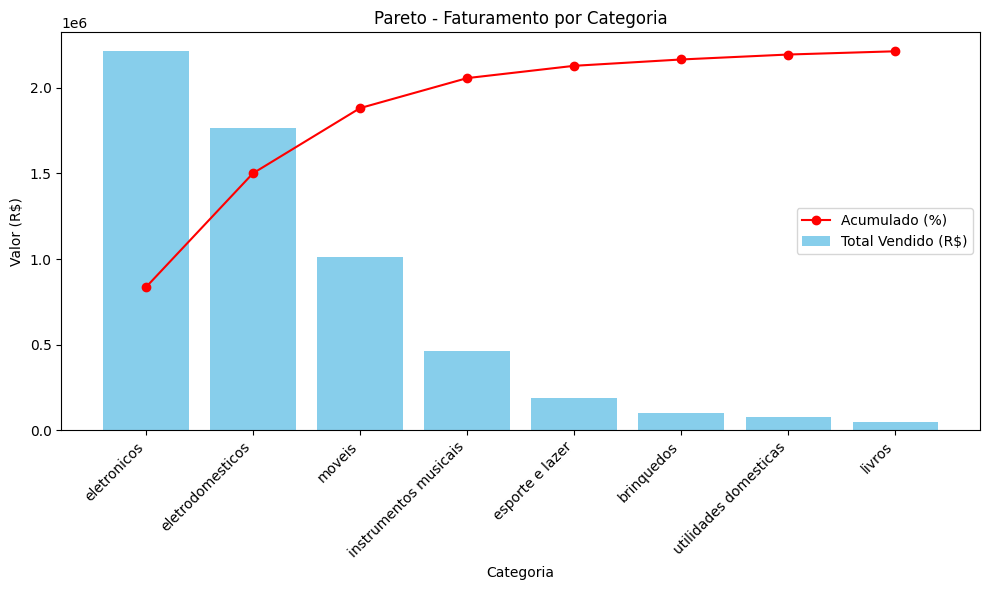

In [70]:
import matplotlib.pyplot as plt

# Agrupamento por Categoria e Total Vendido
categorias = df.groupby('Categoria do Produto')['Preço'].sum().reset_index()
categorias = categorias.sort_values(by='Preço', ascending=False)

# Cálculo do percentual e acumulado
categorias['Porcentagem'] = categorias['Preço'] / categorias['Preço'].sum()
categorias['Acumulado'] = categorias['Porcentagem'].cumsum()

# Plot Pareto (Faturamento por Categoria)
plt.figure(figsize=(10, 6))
plt.bar(categorias['Categoria do Produto'], categorias['Preço'], color='skyblue', label='Total Vendido (R$)')
plt.plot(categorias['Categoria do Produto'], categorias['Acumulado'] * categorias['Preço'].max(), color='red', marker='o', label='Acumulado (%)')
plt.title('Pareto - Faturamento por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


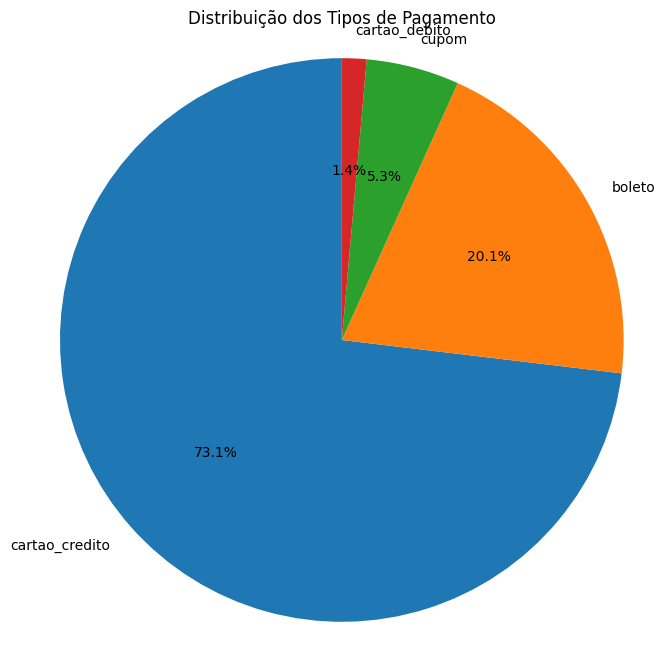

In [69]:
import matplotlib.pyplot as plt

# Contagem dos tipos de pagamento
contagem_pagamentos = df['Tipo de pagamento'].value_counts()

# Plot de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    contagem_pagamentos,
    labels=contagem_pagamentos.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribuição dos Tipos de Pagamento")
plt.axis('equal')  # Garantir formato circular
plt.show()


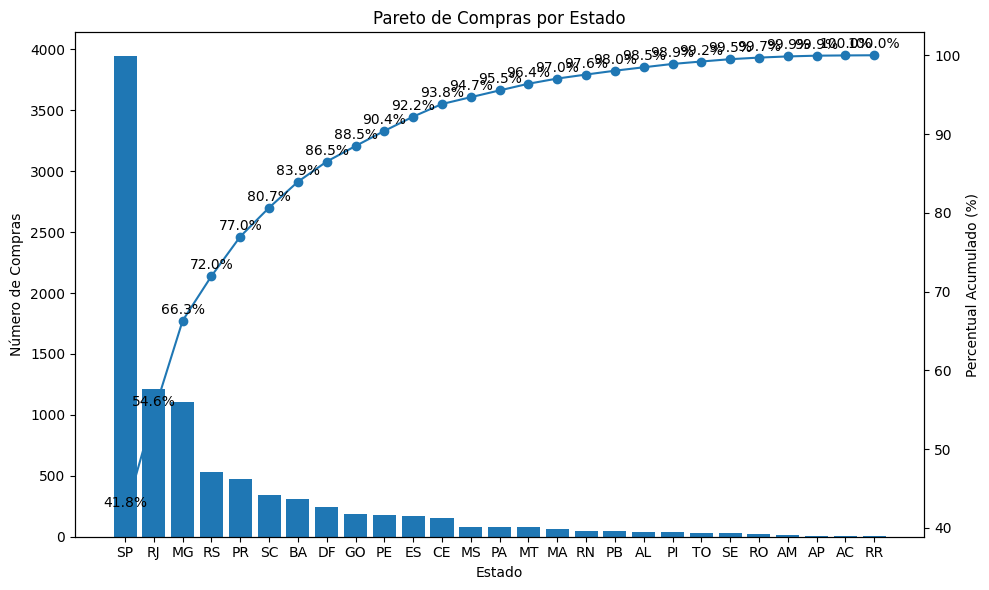

In [68]:
import matplotlib.pyplot as plt

# 1) Agrupa por estado e conta o número de compras
compras_por_estado = df.groupby('Local da compra') \
    .size() \
    .reset_index(name='Total_Compras') \
    .sort_values(by='Total_Compras', ascending=False)

# 2) Calcula porcentagem e acumulado
compras_por_estado['Porcentagem'] = compras_por_estado['Total_Compras'] / compras_por_estado['Total_Compras'].sum()
compras_por_estado['Acumulado'] = compras_por_estado['Porcentagem'].cumsum()

# 3) Plot Pareto
fig, ax = plt.subplots(figsize=(10, 6))

# Barras: número de compras por estado
ax.bar(compras_por_estado['Local da compra'], compras_por_estado['Total_Compras'])
ax.set_xlabel('Estado')
ax.set_ylabel('Número de Compras')
ax.set_title('Pareto de Compras por Estado')

# Linha: percentual acumulado
ax2 = ax.twinx()
ax2.plot(compras_por_estado['Local da compra'], compras_por_estado['Acumulado'] * 100, marker='o')
ax2.set_ylabel('Percentual Acumulado (%)')

# Anotações dos percentuais na curva
for estado, pct in zip(compras_por_estado['Local da compra'], compras_por_estado['Acumulado'] * 100):
    ax2.annotate(f'{pct:.1f}%', (estado, pct), textcoords="offset points", xytext=(0, 5), ha='center')

# Ajustes finais
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-66-7ae26cb6d79d>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(lojas))


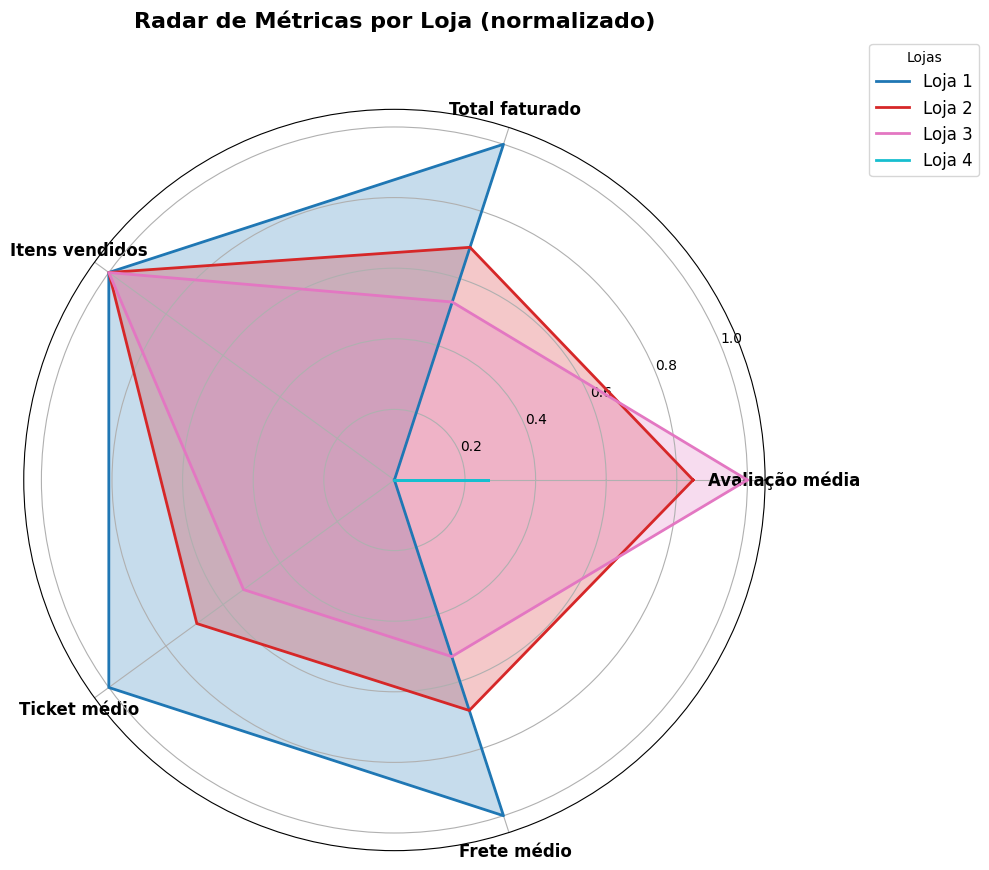

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Construir o DataFrame de métricas por loja
lojas = df['Loja'].unique()
metrics = []
for loja in lojas:
    d = df[df['Loja'] == loja]
    total = d['Preço'].sum()
    itens = len(d)
    metrics.append({
        'Loja': loja,
        'Avaliação média': d['Avaliação da compra'].mean(),
        'Total faturado': total,
        'Itens vendidos': itens,
        'Ticket médio': total / itens,
        'Frete médio': d['Frete'].mean()
    })
metrics_df = pd.DataFrame(metrics).set_index('Loja')

# 2) Normalizar colunas (Min-Max) para deixar no mesmo intervalo
norm = (metrics_df - metrics_df.min()) / (metrics_df.max() - metrics_df.min())

# 3) Preparar ângulos e labels
labels = norm.columns.tolist()
N = len(labels)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# 4) Plot
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10, 10))

# Cores personalizadas
colors = plt.cm.get_cmap("tab10", len(lojas))

# Plotando as linhas e preenchendo com cores
for idx, loja in enumerate(norm.index):
    vals = norm.loc[loja].tolist()
    vals += vals[:1]
    ax.plot(angles, vals, label=loja, color=colors(idx), linewidth=2)
    ax.fill(angles, vals, color=colors(idx), alpha=0.25)

# Melhorando a estética do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
ax.set_title("Radar de Métricas por Loja (normalizado)", y=1.1, fontsize=16, fontweight='bold')

# Adicionando a legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title="Lojas", fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


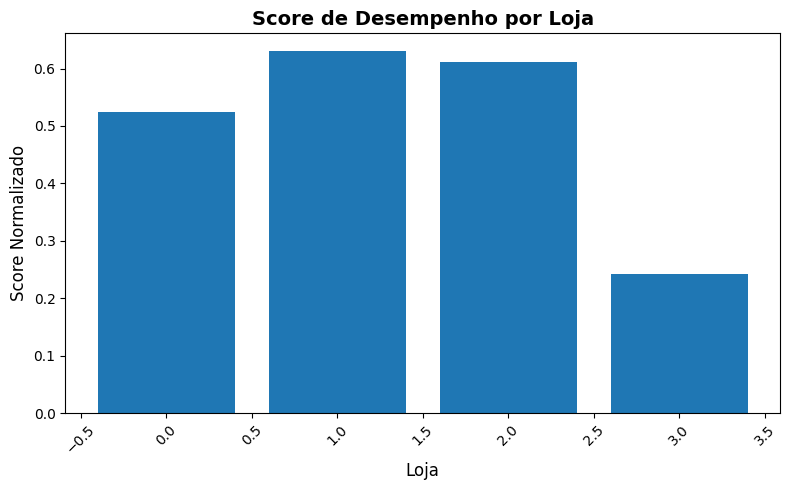

In [67]:
import matplotlib.pyplot as plt

# Supondo que df_norm já esteja disponível e indexado por 'Loja', com coluna 'Score'
# Exemplo de como df_norm deve ser antes deste bloco:
# df_norm = pd.DataFrame({
#     'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
#     'Score': [0.85, 0.67, 0.92, 0.74]
# }).set_index('Loja')

plt.figure(figsize=(8, 5))
plt.bar(df_norm.index, df_norm['Score'])
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Score Normalizado', fontsize=12)
plt.title('Score de Desempenho por Loja', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**Com base nas análises de pareto:**

O que mais vende são eletrônicos, eletrodomésticos e móveis.
Quem mais compra são os estados das regiões Sul e Sudeste.
75% das vendas são feitas em cartão de crédito.

Com base na análise de vendas e avaliações:
As lojas 2 e 3 têm ótimos desempenhos, a loja 1 tem um bom desempenho e a loja 4 se destaca muito como o pior desempenho.

Por isso, a conclusão é focar nos pontos fortes identificados nos paretos para crescer mais e vender a loja 4